# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, MinMaxScaler)
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

# EDA

In [2]:
df = pd.read_csv('data.csv')

In [3]:
pd.set_option('Display.max_columns', None)

#### Observations
* If not churn then reason is null (NaN) 
* 5174 non churners and 5174 null reasons (This is good)
* Count, Country and State only have 1 value each
* Lat long is obsolete
* Churn label is the same as churn value
* Where Total Charges is empty tenure months is 0, so total charges is actually 0
* When internet service is no a bunch of features are no (multicollinearity)
* Churn reason is useful for recommendations, not useful for predicting who will churn
* When phone service is no 'multiple lines' is 'no phone service'. when phone service is yes 'multiple lines' is either yes or no. (Could maybe drop phone service)

In [4]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


In [5]:
df.tail()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,NaN
7042,3186-AJIEK,1,United States,California,Apple Valley,92308,"34.424926, -117.184503",34.424926,-117.184503,Male,No,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,0,NaN


In [6]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Reason'],
      dtype='object')

In [7]:
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Reason          object
dtype: object

In [8]:
df['Churn Value'].value_counts()

Churn Value
0    5174
1    1869
Name: count, dtype: int64

In [9]:
df.replace(r'^\s*$', np.nan, regex=True).isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Reason         5174
dtype: int64

In [10]:
df.shape

(7043, 31)

In [11]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [13]:
len(df) == len(df.drop_duplicates())

True

In [14]:
df.corr(numeric_only = True)

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value
Count,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zip Code,NaN,1.000000,0.895743,-0.784271,0.001041,-0.004596,0.003346
Latitude,NaN,0.895743,1.000000,-0.876779,-0.001631,-0.019899,-0.003384
Longitude,NaN,-0.784271,-0.876779,1.000000,-0.001678,0.024098,0.004594
Tenure Months,NaN,0.001041,-0.001631,-0.001678,1.000000,0.247900,-0.352229
Monthly Charges,NaN,-0.004596,-0.019899,0.024098,0.247900,1.000000,0.193356
Churn Value,NaN,0.003346,-0.003384,0.004594,-0.352229,0.193356,1.000000


In [15]:
df[df['Churn Label'].map({'Yes': 1, 'No': 0}) != df['Churn Value']]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason


In [16]:
df[df['Total Charges'] == 0]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason


In [17]:
df['Total Charges'] = df['Total Charges'].str.strip()  

empty_values = (df['Total Charges'] == '').sum()
print(f"Empty values in 'Total Charges':{empty_values}")

Empty values in 'Total Charges':11


In [18]:
df[df['Total Charges']=='']

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
2234,4472-LVYGI,1,United States,California,San Bernardino,92408,"34.084909, -117.258107",34.084909,-117.258107,Female,No,Yes,No,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No,0,NaN
2438,3115-CZMZD,1,United States,California,Independence,93526,"36.869584, -118.189241",36.869584,-118.189241,Male,No,No,No,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No,0,NaN
2568,5709-LVOEQ,1,United States,California,San Mateo,94401,"37.590421, -122.306467",37.590421,-122.306467,Female,No,Yes,No,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No,0,NaN
2667,4367-NUYAO,1,United States,California,Cupertino,95014,"37.306612, -122.080621",37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No,0,NaN
2856,1371-DWPAZ,1,United States,California,Redcrest,95569,"40.363446, -123.835041",40.363446,-123.835041,Female,No,Yes,No,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No,0,NaN
4331,7644-OMVMY,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No,0,NaN
4687,3213-VVOLG,1,United States,California,Sun City,92585,"33.739412, -117.173334",33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No,0,NaN
5104,2520-SGTTA,1,United States,California,Ben Lomond,95005,"37.078873, -122.090386",37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No,0,NaN
5719,2923-ARZLG,1,United States,California,La Verne,91750,"34.144703, -117.770299",34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No,0,NaN
6772,4075-WKNIU,1,United States,California,Bell,90201,"33.970343, -118.171368",33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No,0,NaN


In [19]:
df[df['Tenure Months']==1]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
6,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,Male,Yes,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,1,Competitor offered more data
7,1066-JKSGK,1,United States,California,Los Angeles,90024,"34.066303, -118.435479",34.066303,-118.435479,Male,No,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes,1,Competitor made better offer
9,8665-UTDHZ,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.2,Yes,1,Competitor had better devices
19,5919-TMRGD,1,United States,California,Huntington Park,90255,"33.97803, -118.217141",33.978030,-118.217141,Female,No,No,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.35,79.35,Yes,1,Product dissatisfaction
31,3091-FYHKI,1,United States,California,Harbor City,90710,"33.798266, -118.300237",33.798266,-118.300237,Male,No,No,No,1,No,No phone service,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,35.45,35.45,Yes,1,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6899,1724-IQWNM,1,United States,California,Burbank,91504,"34.213049, -118.317651",34.213049,-118.317651,Male,No,No,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.30,19.3,No,0,NaN
6903,6127-IYJOZ,1,United States,California,Studio City,91604,"34.139082, -118.39275",34.139082,-118.392750,Male,Yes,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.85,45.85,No,0,NaN
6946,9108-EJFJP,1,United States,California,Jacumba,91934,"32.649787, -116.2237",32.649787,-116.223700,Female,No,Yes,No,1,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.55,53.55,No,0,NaN
6997,5351-QESIO,1,United States,California,San Diego,92122,"32.85723, -117.209774",32.857230,-117.209774,Male,No,No,Yes,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,24.20,24.2,No,0,NaN


# FE

In [20]:
feature_cols = [
    'Latitude',
    'Longitude',
    'Gender',
    'Senior Citizen',
    'Partner',
    'Dependents',
    'Tenure Months',
    'Phone Service',
    'Multiple Lines', 
    'Internet Service', 
    'Online Security',
    'Online Backup', 
    'Device Protection', 
    'Tech Support', 
    'Streaming TV',   
    'Streaming Movies',
    'Contract',
    'Paperless Billing',
    'Payment Method',
    'Monthly Charges',
    'Total Charges',
    'Churn Value'
]

def feature_engineering(df):
    df = df[feature_cols].copy()
    df['Gender'] = df['Gender'].map({'Female':0, 'Male':1, 0:0, 1:1})
    df['Senior Citizen'] = df['Senior Citizen'].map({'No':0, 'Yes':1, 0:0, 1:1})
    df['Partner'] = df['Partner'].map({'No':0, 'Yes':1, 0:0, 1:1})
    df['Dependents'] = df['Dependents'].map({'No':0, 'Yes':1, 0:0, 1:1})
    df['Phone Service'] = df['Phone Service'].map({'No':0, 'Yes':1, 0:0, 1:1})
    df = pd.get_dummies(df, columns = ['Multiple Lines'], drop_first = True, prefix = 'Multiple_Lines', dtype = int)
    df = pd.get_dummies(df, columns = ['Internet Service'], drop_first = True, prefix = 'Internet_Service', dtype = int)
    df = pd.get_dummies(df, columns = ['Online Security'], drop_first = True, prefix = 'Online_Security', dtype = int)
    df = pd.get_dummies(df, columns = ['Online Backup'], drop_first = True, prefix = 'Online_Backup', dtype = int)
    df = pd.get_dummies(df, columns = ['Device Protection'], drop_first = True, prefix = 'Device_Protection', dtype = int)
    df = pd.get_dummies(df, columns = ['Tech Support'], drop_first = True, prefix = 'Tech_Support', dtype = int)
    df = pd.get_dummies(df, columns = ['Streaming TV'], drop_first = True, prefix = 'Streaming_TV', dtype = int)
    df = pd.get_dummies(df, columns = ['Streaming Movies'], drop_first = True, prefix = 'Streaming_Movies', dtype = int)
    df = pd.get_dummies(df, columns = ['Contract'], drop_first = True, prefix = 'Contract', dtype = int)
    df['Paperless Billing'] = df['Paperless Billing'].map({'No':0, 'Yes':1, 0:0, 1:1})
    df = pd.get_dummies(df, columns = ['Payment Method'], drop_first = True, prefix = 'Payment_Method', dtype = int)
        
    return df

def visual_engineering(df):
    df = df[feature_cols].copy()
    df['Gender'] = df['Gender'].map({'Female':0, 'Male':1, 0:0, 1:1})
    df['Senior Citizen'] = df['Senior Citizen'].map({'No':0, 'Yes':1, 0:0, 1:1})
    df['Partner'] = df['Partner'].map({'No':0, 'Yes':1, 0:0, 1:1})
    df['Dependents'] = df['Dependents'].map({'No':0, 'Yes':1, 0:0, 1:1})
    df['Phone Service'] = df['Phone Service'].map({'No':0, 'Yes':1, 0:0, 1:1})
    df['Multiple Lines'] = df['Multiple Lines'].map({'No':1, 'Yes':2, 'No phone service':0, 0:0, 1:1, 2:2})
    df['Internet Service'] = df['Internet Service'].map({'DSL':1, 'Fiber optic':2, 'No':0, 0:0, 1:1, 2:2})
    df['Online Security'] = df['Online Security'].map({'No':1, 'Yes':2, 'No internet service':0, 0:0, 1:1, 2:2})
    df['Online Backup'] = df['Online Backup'].map({'No':1, 'Yes':2, 'No internet service':0, 0:0, 1:1, 2:2})
    df['Device Protection'] = df['Device Protection'].map({'No':1, 'Yes':2, 'No internet service':0, 0:0, 1:1, 2:2})
    df['Tech Support'] = df['Tech Support'].map({'No':1, 'Yes':2, 'No internet service':0, 0:0, 1:1, 2:2})
    df['Streaming TV'] = df['Streaming TV'].map({'No':1, 'Yes':2, 'No internet service':0, 0:0, 1:1, 2:2})
    df['Streaming Movies'] = df['Streaming Movies'].map({'No':1, 'Yes':2, 'No internet service':0, 0:0, 1:1, 2:2})
    df['Contract'] = df['Contract'].map({'Month-to-month':0, 'Two year':2, 'One year':1, 0:0, 1:1, 2:2})
    df['Paperless Billing'] = df['Paperless Billing'].map({'No':0, 'Yes':1, 0:0, 1:1})
    df['Payment Method'] = df['Payment Method'].map({'Mailed check':3, 'Electronic check':2, 'Bank transfer (automatic)':1, 'Credit card (automatic)':0, 0:0, 1:1, 2:2, 3:3})
    df.loc[df['Tenure Months'] == 0, 'Total Charges'] = 0
    df['Total Charges'] = df['Total Charges'].astype(float)
        
    return df

df_fe = feature_engineering(df)
df_visual = visual_engineering(df)
df_visual.head()

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,33.964131,-118.272783,1,0,0,0,2,1,1,1,2,2,1,1,1,1,0,1,3,53.85,108.15,1
1,34.059281,-118.307420,0,0,0,1,2,1,1,2,1,1,1,1,1,1,0,1,2,70.70,151.65,1
2,34.048013,-118.293953,0,0,0,1,8,1,2,2,1,1,2,1,2,2,0,1,2,99.65,820.50,1
3,34.062125,-118.315709,0,0,1,1,28,1,2,2,1,1,2,2,2,2,0,1,2,104.80,3046.05,1
4,34.039224,-118.266293,1,0,0,1,49,1,2,2,1,2,2,1,2,2,0,1,1,103.70,5036.30,1


In [21]:
df_visual.shape

(7043, 22)

In [22]:
df['Payment Method'].unique()

array(['Mailed check', 'Electronic check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [23]:
df_fe.dtypes

Latitude                                  float64
Longitude                                 float64
Gender                                      int64
Senior Citizen                              int64
Partner                                     int64
Dependents                                  int64
Tenure Months                               int64
Phone Service                               int64
Paperless Billing                           int64
Monthly Charges                           float64
Total Charges                             float64
Churn Value                                 int64
Multiple_Lines_No phone service             int32
Multiple_Lines_Yes                          int32
Internet_Service_Fiber optic                int32
Internet_Service_No                         int32
Online_Security_No internet service         int32
Online_Security_Yes                         int32
Online_Backup_No internet service           int32
Online_Backup_Yes                           int32


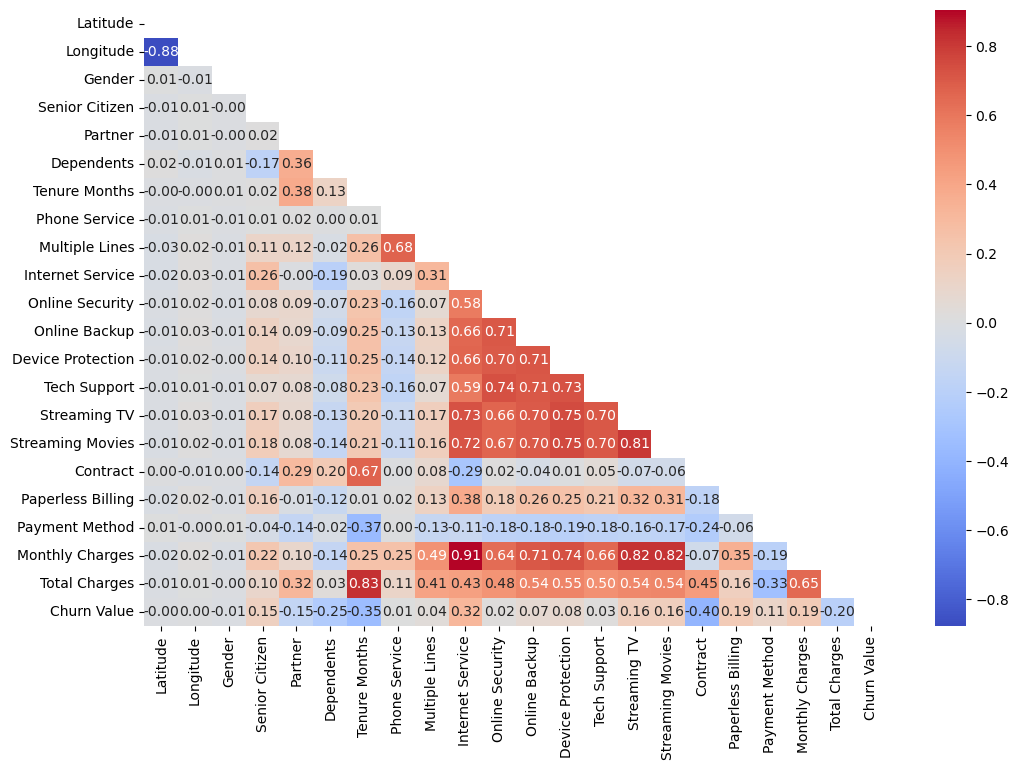

In [24]:
plt.figure(figsize=(12, 8)) 

sns.heatmap(
    df_visual.corr(),
    mask=np.triu(df_visual.corr()),
    annot=True,           
    fmt='.2f',             
    cmap='coolwarm'           
)

plt.show()

#### Key findings
* less likely to churn if you are with family members (Partners and Dependents)
* more likely to churn if you are old and alone
* more likely to churn if you have internet service (+ other features) might be because you're paying more?
* less likely to churn if you have been a customer for a long time (tenure months)
* less likely to churn if you've spent a lot in total (total charges) but more likely as you spend more each month (monthly charges)

#### Features with the most influence
* Contract
* Tenure Months
* Internet service
* Dependents/Partner/Senior
* Paperless billing
* Monthly charges
* Streaming TV/Movies

In [25]:
df[df['Streaming Movies']!=df['Streaming TV']]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
6,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,Male,Yes,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,1,Competitor offered more data
14,7760-OYPDY,1,United States,California,Los Angeles,90056,"33.987945, -118.370442",33.987945,-118.370442,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,80.65,144.15,Yes,1,Competitor offered more data
19,5919-TMRGD,1,United States,California,Huntington Park,90255,"33.97803, -118.217141",33.978030,-118.217141,Female,No,No,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.35,79.35,Yes,1,Product dissatisfaction
25,0486-HECZI,1,United States,California,Torrance,90504,"33.867257, -118.330794",33.867257,-118.330794,Male,No,Yes,Yes,55,Yes,Yes,Fiber optic,Yes,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,96.75,5238.9,Yes,1,Long distance charges
31,3091-FYHKI,1,United States,California,Harbor City,90710,"33.798266, -118.300237",33.798266,-118.300237,Male,No,No,No,1,No,No phone service,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,35.45,35.45,Yes,1,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7020,9053-EJUNL,1,United States,California,Mecca,92254,"33.543835, -115.993906",33.543835,-115.993906,Male,No,No,No,41,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.20,3645.75,No,0,NaN
7021,0666-UXTJO,1,United States,California,Morongo Valley,92256,"34.097863, -116.594561",34.097863,-116.594561,Male,Yes,Yes,No,34,Yes,No,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),85.20,2874.45,No,0,NaN
7029,2823-LKABH,1,United States,California,Rancho Mirage,92270,"33.763678, -116.429928",33.763678,-116.429928,Female,No,No,No,18,Yes,Yes,Fiber optic,No,No,Yes,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),95.05,1679.4,No,0,NaN
7031,9281-CEDRU,1,United States,California,Salton City,92275,"33.28156, -115.955541",33.281560,-115.955541,Female,No,Yes,No,68,Yes,No,DSL,No,Yes,No,Yes,Yes,No,Two year,No,Bank transfer (automatic),64.10,4326.25,No,0,NaN


In [26]:
df[(df['Streaming Movies'] == 'Yes') & (df['Streaming TV'] == 'Yes')]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices
8,6467-CHFZW,1,United States,California,Los Angeles,90028,"34.099869, -118.326843",34.099869,-118.326843,Male,No,Yes,Yes,47,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes,1,Competitor had better devices
10,8773-HHUOZ,1,United States,California,Los Angeles,90032,"34.078821, -118.177576",34.078821,-118.177576,Female,No,No,No,17,Yes,No,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,64.70,1093.1,Yes,1,Competitor offered higher download speeds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7032,2235-DWLJU,1,United States,California,Thousand Palms,92276,"33.849263, -116.382778",33.849263,-116.382778,Female,Yes,No,No,6,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No,0,NaN
7037,7750-EYXWZ,1,United States,California,Yucca Valley,92284,"34.159534, -116.425984",34.159534,-116.425984,Female,No,No,No,12,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No,0,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,NaN


In [27]:
df[(df['Internet Service'] == 'DSL') & (df['Streaming TV'] == 'Yes')]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
10,8773-HHUOZ,1,United States,California,Los Angeles,90032,"34.078821, -118.177576",34.078821,-118.177576,Female,No,No,No,17,Yes,No,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,64.70,1093.1,Yes,1,Competitor offered higher download speeds
30,6207-WIOLX,1,United States,California,Avalon,90704,"33.391181, -118.421305",33.391181,-118.421305,Female,No,Yes,No,25,No,No phone service,DSL,Yes,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),58.60,1502.65,Yes,1,Lack of self-service on Website
54,2232-DMLXU,1,United States,California,Van Nuys,91411,"34.17847, -118.459472",34.178470,-118.459472,Female,No,Yes,No,1,Yes,No,DSL,No,No,No,No,Yes,No,Month-to-month,No,Mailed check,55.20,55.2,Yes,1,Poor expertise of online support
61,9514-JDSKI,1,United States,California,El Monte,91732,"34.074492, -118.01462",34.074492,-118.014620,Male,Yes,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,Yes,No,Month-to-month,No,Electronic check,40.20,40.2,Yes,1,Limited range of services
80,2321-OMBXY,1,United States,California,Carlsbad,92009,"33.098018, -117.258203",33.098018,-117.258203,Female,No,Yes,No,38,Yes,No,DSL,Yes,Yes,No,Yes,Yes,Yes,One year,No,Credit card (automatic),80.30,3058.65,Yes,1,Limited range of services
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7030,0550-DCXLH,1,United States,California,Thermal,92274,"33.53604, -116.119222",33.536040,-116.119222,Male,No,No,No,13,Yes,No,DSL,No,Yes,No,Yes,Yes,Yes,Month-to-month,No,Mailed check,73.35,931.55,No,0,NaN
7031,9281-CEDRU,1,United States,California,Salton City,92275,"33.28156, -115.955541",33.281560,-115.955541,Female,No,Yes,No,68,Yes,No,DSL,No,Yes,No,Yes,Yes,No,Two year,No,Bank transfer (automatic),64.10,4326.25,No,0,NaN
7032,2235-DWLJU,1,United States,California,Thousand Palms,92276,"33.849263, -116.382778",33.849263,-116.382778,Female,Yes,No,No,6,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No,0,NaN
7037,7750-EYXWZ,1,United States,California,Yucca Valley,92284,"34.159534, -116.425984",34.159534,-116.425984,Female,No,No,No,12,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No,0,NaN


In [28]:
df[(df['Internet Service'] == 'Fiber optic') & (df['Streaming TV'] == 'No')]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
11,6047-YHPVI,1,United States,California,Los Angeles,90039,"34.110845, -118.259595",34.110845,-118.259595,Male,No,No,Yes,5,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.70,316.9,Yes,1,Competitor offered higher download speeds
16,7495-OOKFY,1,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237,Female,Yes,Yes,Yes,8,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),80.65,633.3,Yes,1,Competitor made better offer
20,9191-MYQKX,1,United States,California,Lynwood,90262,"33.923573, -118.200669",33.923573,-118.200669,Female,No,Yes,Yes,7,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.15,496.9,Yes,1,Service dissatisfaction
21,8637-XJIVR,1,United States,California,Marina Del Rey,90292,"33.977468, -118.445475",33.977468,-118.445475,Female,No,No,Yes,12,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,78.95,927.35,Yes,1,Lack of self-service on Website
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7011,0928-XUTSN,1,United States,California,Brawley,92227,"33.03933, -115.191857",33.039330,-115.191857,Female,No,No,No,13,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,80.50,1011.8,No,0,NaN
7015,6075-SLNIL,1,United States,California,Desert Center,92239,"33.889605, -115.257009",33.889605,-115.257009,Male,No,No,No,38,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),95.10,3691.2,No,0,NaN
7028,7398-LXGYX,1,United States,California,Pioneertown,92268,"34.201108, -116.593456",34.201108,-116.593456,Male,No,Yes,No,44,Yes,Yes,Fiber optic,Yes,No,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),84.80,3626.35,No,0,NaN
7029,2823-LKABH,1,United States,California,Rancho Mirage,92270,"33.763678, -116.429928",33.763678,-116.429928,Female,No,No,No,18,Yes,Yes,Fiber optic,No,No,Yes,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),95.05,1679.4,No,0,NaN


In [29]:
df_fe.head()

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Total Charges,Churn Value,Multiple_Lines_No phone service,Multiple_Lines_Yes,Internet_Service_Fiber optic,Internet_Service_No,Online_Security_No internet service,Online_Security_Yes,Online_Backup_No internet service,Online_Backup_Yes,Device_Protection_No internet service,Device_Protection_Yes,Tech_Support_No internet service,Tech_Support_Yes,Streaming_TV_No internet service,Streaming_TV_Yes,Streaming_Movies_No internet service,Streaming_Movies_Yes,Contract_One year,Contract_Two year,Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check
0,33.964131,-118.272783,1,0,0,0,2,1,1,53.85,108.15,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,34.059281,-118.307420,0,0,0,1,2,1,1,70.70,151.65,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,34.048013,-118.293953,0,0,0,1,8,1,1,99.65,820.50,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
3,34.062125,-118.315709,0,0,1,1,28,1,1,104.80,3046.05,1,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0
4,34.039224,-118.266293,1,0,0,1,49,1,1,103.70,5036.30,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0


# Linreg Model

In [396]:
#feature_cols = list(df_fe.columns)
feature_cols = ['Tenure Months', 'Internet_Service_Fiber optic', 'Dependents', 'Payment_Method_Electronic check', 'Contract_One year', 'Device_Protection_No internet service', 'Total Charges', 'Online_Backup_No internet service', 'Online_Security_No internet service', 'Internet_Service_No', 'Streaming_Movies_No internet service', 'Tech_Support_No internet service', 'Streaming_TV_No internet service', 'Online_Security_Yes', 'Paperless Billing', 'Streaming_Movies_Yes', 'Tech_Support_Yes', 'Multiple_Lines_Yes', 'Streaming_TV_Yes', 'Contract_Two year', 'Partner']
#feature_cols.remove('Churn Value')

X = df_fe[feature_cols]
y = df_fe['Churn Value']

In [397]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [398]:
X_train.shape[0]

5634

In [399]:
#scale_cols = ['Latitude', 'Longitude', 'Tenure Months', 'Monthly Charges', 'Total Charges']
scale_cols = ['Tenure Months', 'Total Charges']
              
scaler = MinMaxScaler()
scaler.fit(X_train[scale_cols])

def scale(df, scaler, scale_cols):
    df = df.copy()
    df[scale_cols] = scaler.transform(df[scale_cols])
    return df

In [400]:
X_train_scaled = scale(X_train, scaler, scale_cols)

In [401]:
X_train_scaled.head()

,Tenure Months,Internet_Service_Fiber optic,Dependents,Payment_Method_Electronic check,Contract_One year,Device_Protection_No internet service,Total Charges,Online_Backup_No internet service,Online_Security_No internet service,Internet_Service_No,Streaming_Movies_No internet service,Tech_Support_No internet service,Streaming_TV_No internet service,Online_Security_Yes,Paperless Billing,Streaming_Movies_Yes,Tech_Support_Yes,Multiple_Lines_Yes,Streaming_TV_Yes,Contract_Two year,Partner
2142,0.986111,1,0,0,1,0,0.801728,0,0,0,0,0,0,0,1,1,0,1,1,0,1
1623,0.222222,1,0,0,0,0,0.181202,0,0,0,0,0,0,0,1,1,0,0,0,0,0
6074,0.444444,1,0,0,1,0,0.393429,0,0,0,0,0,0,0,1,1,0,1,1,0,0
1362,0.333333,0,0,0,0,0,0.107464,0,0,0,0,0,0,0,1,1,0,0,0,0,1
6754,0.277778,0,1,0,0,1,0.046754,1,1,1,1,1,1,0,0,0,0,0,0,0,1


In [402]:
lr = LogisticRegression(max_iter=300, random_state=10, class_weight='balanced')

In [403]:
X_train_scaled.shape[0]

5634

In [404]:
lr.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=300, random_state=10)

In [405]:
lr.predict_proba(X_train_scaled)

array([[0.60596359, 0.39403641],
       [0.21417458, 0.78582542],
       [0.35847805, 0.64152195],
       ...,
       [0.97721865, 0.02278135],
       [0.96396537, 0.03603463],
       [0.27718084, 0.72281916]])

In [406]:
df_prediction = X_train_scaled.copy()
df_prediction[['prob_not_churn', 'prob_churn']] = lr.predict_proba(X_train_scaled)
df_prediction['Churn Value'] = y_train

In [407]:
df_prediction.head(10)

,Tenure Months,Internet_Service_Fiber optic,Dependents,Payment_Method_Electronic check,Contract_One year,Device_Protection_No internet service,Total Charges,Online_Backup_No internet service,Online_Security_No internet service,Internet_Service_No,Streaming_Movies_No internet service,Tech_Support_No internet service,Streaming_TV_No internet service,Online_Security_Yes,Paperless Billing,Streaming_Movies_Yes,Tech_Support_Yes,Multiple_Lines_Yes,Streaming_TV_Yes,Contract_Two year,Partner,prob_not_churn,prob_churn,Churn Value
2142,0.986111,1,0,0,1,0,0.801728,0,0,0,0,0,0,0,1,1,0,1,1,0,1,0.605964,0.394036,0
1623,0.222222,1,0,0,0,0,0.181202,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0.214175,0.785825,1
6074,0.444444,1,0,0,1,0,0.393429,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0.358478,0.641522,0
1362,0.333333,0,0,0,0,0,0.107464,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0.369698,0.630302,1
6754,0.277778,0,1,0,0,1,0.046754,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0.910810,0.089190,0
1212,0.027778,1,0,1,0,0,0.019148,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0.107828,0.892172,1
2722,0.722222,0,0,0,1,0,0.392709,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0.811341,0.188659,0
4006,0.513889,0,0,0,1,1,0.082616,1,1,1,1,1,1,0,1,0,0,0,0,0,1,0.874261,0.125739,0
6791,0.569444,0,0,0,0,0,0.355869,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0.655152,0.344848,0
5466,0.805556,0,1,0,1,0,0.495210,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0.941064,0.058936,0


In [408]:
df_prediction['y_pred'] = np.where(df_prediction['prob_churn']>0.5, 1, 0)

In [409]:
df_prediction.head(10)

,Tenure Months,Internet_Service_Fiber optic,Dependents,Payment_Method_Electronic check,Contract_One year,Device_Protection_No internet service,Total Charges,Online_Backup_No internet service,Online_Security_No internet service,Internet_Service_No,Streaming_Movies_No internet service,Tech_Support_No internet service,Streaming_TV_No internet service,Online_Security_Yes,Paperless Billing,Streaming_Movies_Yes,Tech_Support_Yes,Multiple_Lines_Yes,Streaming_TV_Yes,Contract_Two year,Partner,prob_not_churn,prob_churn,Churn Value,y_pred
2142,0.986111,1,0,0,1,0,0.801728,0,0,0,0,0,0,0,1,1,0,1,1,0,1,0.605964,0.394036,0,0
1623,0.222222,1,0,0,0,0,0.181202,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0.214175,0.785825,1,1
6074,0.444444,1,0,0,1,0,0.393429,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0.358478,0.641522,0,1
1362,0.333333,0,0,0,0,0,0.107464,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0.369698,0.630302,1,1
6754,0.277778,0,1,0,0,1,0.046754,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0.910810,0.089190,0,0
1212,0.027778,1,0,1,0,0,0.019148,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0.107828,0.892172,1,1
2722,0.722222,0,0,0,1,0,0.392709,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0.811341,0.188659,0,0
4006,0.513889,0,0,0,1,1,0.082616,1,1,1,1,1,1,0,1,0,0,0,0,0,1,0.874261,0.125739,0,0
6791,0.569444,0,0,0,0,0,0.355869,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0.655152,0.344848,0,0
5466,0.805556,0,1,0,1,0,0.495210,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0.941064,0.058936,0,0


In [410]:
print(metrics.confusion_matrix(y_train, df_prediction['y_pred']))

[[3082 1083]
 [ 276 1193]]


In [411]:
def get_results(actual, predicted):
    print("The confusion matrix for your predictions is:")
    print(metrics.confusion_matrix(actual, predicted), "\n")
    print(f'The accuracy of your model is: {metrics.accuracy_score(actual, predicted)}')
    print(f'The recall of your model is: {metrics.recall_score(actual, predicted)}')
    print(f'The precision of your model is: {metrics.precision_score(actual, predicted)}')
    print(f'The F1-score of your model is: {metrics.f1_score(actual, predicted)}')

In [412]:
get_results(y_train, df_prediction['y_pred'])

The confusion matrix for your predictions is:
[[3082 1083]
 [ 276 1193]] 

The accuracy of your model is: 0.7587859424920128
The recall of your model is: 0.8121170864533697
The precision of your model is: 0.5241652021089631
The F1-score of your model is: 0.6371161548731642


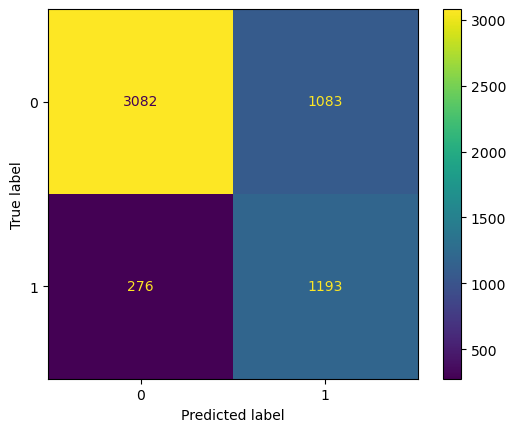

In [413]:
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_train, df_prediction['y_pred'])).plot()
plt.show()

In [414]:
X_test_scaled = scale(X_test, scaler, scale_cols)
X_test_scaled.head()

,Tenure Months,Internet_Service_Fiber optic,Dependents,Payment_Method_Electronic check,Contract_One year,Device_Protection_No internet service,Total Charges,Online_Backup_No internet service,Online_Security_No internet service,Internet_Service_No,Streaming_Movies_No internet service,Tech_Support_No internet service,Streaming_TV_No internet service,Online_Security_Yes,Paperless Billing,Streaming_Movies_Yes,Tech_Support_Yes,Multiple_Lines_Yes,Streaming_TV_Yes,Contract_Two year,Partner
185,0.208333,1,0,0,0,0,0.146181,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2715,0.250000,0,0,0,0,0,0.123739,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3825,0.027778,0,0,0,0,1,0.004709,1,1,1,1,1,1,0,1,0,0,0,0,0,0
1807,0.083333,1,0,1,0,0,0.059777,0,0,0,0,0,0,0,1,1,0,0,0,0,1
132,0.555556,1,0,0,0,0,0.475768,0,0,0,0,0,0,0,0,1,1,1,1,0,0


In [415]:
df_test_prediction = X_test_scaled.copy()
df_test_prediction[['prob_not_churn', 'prob_churn']] = lr.predict_proba(X_test_scaled)
df_test_prediction['Churn Value'] = y_test

In [416]:
df_test_prediction.head()

,Tenure Months,Internet_Service_Fiber optic,Dependents,Payment_Method_Electronic check,Contract_One year,Device_Protection_No internet service,Total Charges,Online_Backup_No internet service,Online_Security_No internet service,Internet_Service_No,Streaming_Movies_No internet service,Tech_Support_No internet service,Streaming_TV_No internet service,Online_Security_Yes,Paperless Billing,Streaming_Movies_Yes,Tech_Support_Yes,Multiple_Lines_Yes,Streaming_TV_Yes,Contract_Two year,Partner,prob_not_churn,prob_churn,Churn Value
185,0.208333,1,0,0,0,0,0.146181,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0.214143,0.785857,1
2715,0.250000,0,0,0,0,0,0.123739,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0.384594,0.615406,0
3825,0.027778,0,0,0,0,1,0.004709,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0.495247,0.504753,0
1807,0.083333,1,0,1,0,0,0.059777,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0.097678,0.902322,1
132,0.555556,1,0,0,0,0,0.475768,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0.414371,0.585629,1


In [417]:
df_test_prediction['y_pred'] = np.where(df_test_prediction['prob_churn']>0.5, 1, 0)
df_test_prediction.head()

,Tenure Months,Internet_Service_Fiber optic,Dependents,Payment_Method_Electronic check,Contract_One year,Device_Protection_No internet service,Total Charges,Online_Backup_No internet service,Online_Security_No internet service,Internet_Service_No,Streaming_Movies_No internet service,Tech_Support_No internet service,Streaming_TV_No internet service,Online_Security_Yes,Paperless Billing,Streaming_Movies_Yes,Tech_Support_Yes,Multiple_Lines_Yes,Streaming_TV_Yes,Contract_Two year,Partner,prob_not_churn,prob_churn,Churn Value,y_pred
185,0.208333,1,0,0,0,0,0.146181,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0.214143,0.785857,1,1
2715,0.250000,0,0,0,0,0,0.123739,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0.384594,0.615406,0,1
3825,0.027778,0,0,0,0,1,0.004709,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0.495247,0.504753,0,1
1807,0.083333,1,0,1,0,0,0.059777,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0.097678,0.902322,1,1
132,0.555556,1,0,0,0,0,0.475768,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0.414371,0.585629,1,1


In [418]:
get_results(y_test, df_test_prediction['y_pred'])

The confusion matrix for your predictions is:
[[725 284]
 [ 81 319]] 

The accuracy of your model is: 0.7409510290986515
The recall of your model is: 0.7975
The precision of your model is: 0.5290215588723052
The F1-score of your model is: 0.6360917248255235


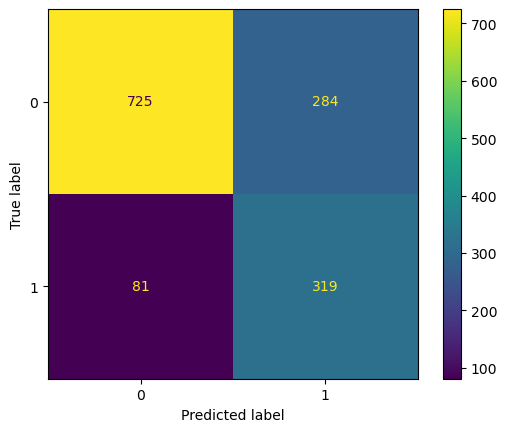

In [332]:
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test, df_test_prediction['y_pred'])).plot()
plt.show()

In [362]:
coefficients = lr.coef_[0]
coeff_df = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Coefficient': coefficients
})

In [369]:
coeff_df.sort_values('Coefficient', ascending=False)

,Feature,Coefficient
6,Total Charges,1.300890
1,Internet_Service_Fiber optic,0.545130
3,Payment_Method_Electronic check,0.383253
14,Paperless Billing,0.359366
20,Partner,0.240595
17,Multiple_Lines_Yes,0.219106
15,Streaming_Movies_Yes,0.218810
18,Streaming_TV_Yes,0.217792
12,Streaming_TV_No internet service,-0.132549
11,Tech_Support_No internet service,-0.132549


# Demographics

#### Churners
* What do they look like? Gender, age, family makeup etc. Why are they churning?

In [91]:
df[df['Churn Value']==1][['Gender', 'Senior Citizen', 'Partner', 'Dependents']].groupby('Gender').value_counts()

Gender  Senior Citizen  Partner  Dependents
Female  No              No       No            439
                        Yes      No            209
        Yes             No       No            155
                        Yes      No             76
        No              Yes      Yes            29
                        No       Yes            22
        Yes             Yes      Yes             5
                        No       Yes             4
Male    No              No       No            438
                        Yes      No            213
        Yes             No       No            118
                        Yes      No            115
        No              No       Yes            23
                        Yes      Yes            20
        Yes             Yes      Yes             2
                        No       Yes             1
Name: count, dtype: int64

In [92]:
df[df['Churn Value']==1][['Senior Citizen']].value_counts()

Senior Citizen
No                1393
Yes                476
Name: count, dtype: int64

In [93]:
df[df['Churn Value']==1][['Gender']].value_counts()

Gender
Female    939
Male      930
Name: count, dtype: int64

In [94]:
df[df['Churn Value']==1][['Dependents']].value_counts()

Dependents
No            1763
Yes            106
Name: count, dtype: int64

In [95]:
df[df['Churn Value']==1][['Partner']].value_counts()

Partner
No         1200
Yes         669
Name: count, dtype: int64

In [96]:
df[df['Churn Value']==1][['Churn Reason']].value_counts()

Churn Reason                             
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Long distance charges                         44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                   

In [97]:
df[df['Churn Reason']=='Attitude of support person'].value_counts('Tech Support') # This is potentially an interesting find. Most people that dislike the support don't have tech support.

Tech Support
No                     146
Yes                     28
No internet service     18
Name: count, dtype: int64

#### Observations
* Female (939)
    * Old (240)
    * Young (699)
* Male (930)
    * Old (236)
    * Young (694)
 

In [98]:
df[df['Churn Value']==1].pivot_table(
    index = 'Gender', 
    columns = ['Senior Citizen','Partner', 'Dependents'], 
    aggfunc = {'Count':'count'}
)

Count                               
Senior Citizen    No               Yes             
Partner           No      Yes       No      Yes    
Dependents        No Yes   No Yes   No Yes   No Yes
Gender                                             
Female           439  22  209  29  155   4   76   5
Male             438  23  213  20  118   1  115   2

# Feature Selection

In [152]:
def calculate_vif(X, thresh = 20):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        # this bit uses list comprehension to gather all the VIF values of the different variables
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]
        
        maxloc = vif.index(max(vif)) # getting the index of the highest VIF value
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc] # we delete the highest VIF value on condition that it's higher than the threshold
            dropped = True # if we deleted anything, we set the 'dropped' value to True to stay in the while loop

    print('Remaining variables:')
    print(X.columns[variables]) # finally, we print the variables that are still in our set
    return X.iloc[:, variables] # and return our X cut down to the remaining variables777

In [153]:
VIF_variables = calculate_vif(df_fe[list(df_fe.columns)])

# Error shows 'RuntimeWarning: divide by zero encountered in scalar divide vif = 1. / (1. - r_squared_i)' this is because
# the R^2 for some features is 1 resulting in 1 / 0, this causes the error since VIF is essentially infinite.
# this happens when the variance in the target for a specific feature is fully explainable by a combination of other features
# high levels of multicollinearity

C:\Users\legom\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


dropping 'Internet_Service_No' at index: 15
dropping 'Online_Security_No internet service' at index: 15
dropping 'Online_Backup_No internet service' at index: 16
dropping 'Device_Protection_No internet service' at index: 17
dropping 'Tech_Support_No internet service' at index: 18
dropping 'Streaming_TV_No internet service' at index: 19
dropping 'Phone Service' at index: 7
dropping 'Monthly Charges' at index: 8
dropping 'Longitude' at index: 1
dropping 'Total Charges' at index: 7
Remaining variables:
Index(['Latitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Paperless Billing', 'Churn Value',
       'Multiple_Lines_No phone service', 'Multiple_Lines_Yes',
       'Internet_Service_Fiber optic', 'Online_Security_Yes',
       'Online_Backup_Yes', 'Device_Protection_Yes', 'Tech_Support_Yes',
       'Streaming_TV_Yes', 'Streaming_Movies_No internet service',
       'Streaming_Movies_Yes', 'Contract_One year', 'Contract_Two year',
       'Payment_Method_C

In [145]:
VIF_variables

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Paperless Billing,Churn Value,Multiple_Lines_No phone service,Multiple_Lines_Yes,Internet_Service_Fiber optic,Online_Security_Yes,Online_Backup_Yes,Device_Protection_Yes,Tech_Support_Yes,Streaming_TV_Yes,Streaming_Movies_No internet service,Streaming_Movies_Yes,Contract_One year,Contract_Two year,Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check
0,1,0,0,0,2,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,1,8,1,1,0,1,1,0,0,1,0,1,0,1,0,0,0,1,0
3,0,0,1,1,28,1,1,0,1,1,0,0,1,1,1,0,1,0,0,0,1,0
4,1,0,0,1,49,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,72,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
7039,1,0,1,1,24,1,0,0,1,0,1,0,1,1,1,0,1,1,0,0,0,1
7040,0,0,1,1,72,1,0,0,1,1,0,1,1,0,1,0,1,1,0,1,0,0
7041,0,0,1,1,11,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [334]:
def stepwise_selection(X, y, threshold_in = 0.01, threshold_out = 0.05, verbose = True):
    # The function is checking for p-values (whether features are statistically significant) - lower is better
    included = [] # this is going to be the list of features we keep
    while True:
        changed = False
        # forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index = excluded, dtype = 'float64')
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        # we add the feature with the lowest (best) p-value under the threshold to our 'included' list
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval)) # specifying the verbose text


        # backward step: removing features if new features added to the list make them statistically insignificant
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        # if the p-value exceeds the upper threshold, the feature will be dropped from the 'included' list
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [335]:
cols = list(df_fe.columns)
cols.remove('Churn Value')
print(cols)
result = stepwise_selection(df_fe[cols], df_fe['Churn Value'])

print('resulting features:')
print(result)

['Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Paperless Billing', 'Monthly Charges', 'Total Charges', 'Multiple_Lines_No phone service', 'Multiple_Lines_Yes', 'Internet_Service_Fiber optic', 'Internet_Service_No', 'Online_Security_No internet service', 'Online_Security_Yes', 'Online_Backup_No internet service', 'Online_Backup_Yes', 'Device_Protection_No internet service', 'Device_Protection_Yes', 'Tech_Support_No internet service', 'Tech_Support_Yes', 'Streaming_TV_No internet service', 'Streaming_TV_Yes', 'Streaming_Movies_No internet service', 'Streaming_Movies_Yes', 'Contract_One year', 'Contract_Two year', 'Payment_Method_Credit card (automatic)', 'Payment_Method_Electronic check', 'Payment_Method_Mailed check']
Add  Tenure Months                  with p-value 7.99906e-205
Add  Internet_Service_Fiber optic   with p-value 4.23886e-186
Add  Dependents                     with p-value 3.08048e-49
Add  Payment_Method_E

In [342]:
df_prediction[df_prediction['Churn Value'] == 0].sort_values('prob_churn', ascending = False).head(500)
df_prediction.to_csv('top_500.csv', index=False)

,Tenure Months,Internet_Service_Fiber optic,Dependents,Payment_Method_Electronic check,Contract_One year,Device_Protection_No internet service,Total Charges,Online_Backup_No internet service,Online_Security_No internet service,Internet_Service_No,Streaming_Movies_No internet service,Tech_Support_No internet service,Streaming_TV_No internet service,Online_Security_Yes,Paperless Billing,Streaming_Movies_Yes,Tech_Support_Yes,Multiple_Lines_Yes,Streaming_TV_Yes,Contract_Two year,Partner,prob_not_churn,prob_churn,Churn Value,y_pred
4624,0.027778,1,0,1,0,0,0.015435,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0.071314,0.928686,0,1
2567,0.055556,1,0,1,0,0,0.035470,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0.075770,0.924230,0,1
3712,0.083333,1,0,1,0,0,0.058982,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0.080072,0.919928,0,1
4927,0.097222,1,0,1,0,0,0.069714,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0.082545,0.917455,0,1
3141,0.041667,1,0,1,0,0,0.031457,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0.083079,0.916921,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3641,0.430556,1,0,1,1,0,0.326490,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0.279754,0.720246,0,1
7027,0.875000,1,0,1,0,0,0.746062,0,0,0,0,0,0,0,1,1,0,1,1,0,1,0.279803,0.720197,0,1
6981,0.166667,0,0,1,0,0,0.060232,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.279917,0.720083,0,1
4953,0.861111,1,0,1,0,0,0.709826,0,0,0,0,0,0,0,1,1,0,1,1,0,1,0.280083,0.719917,0,1


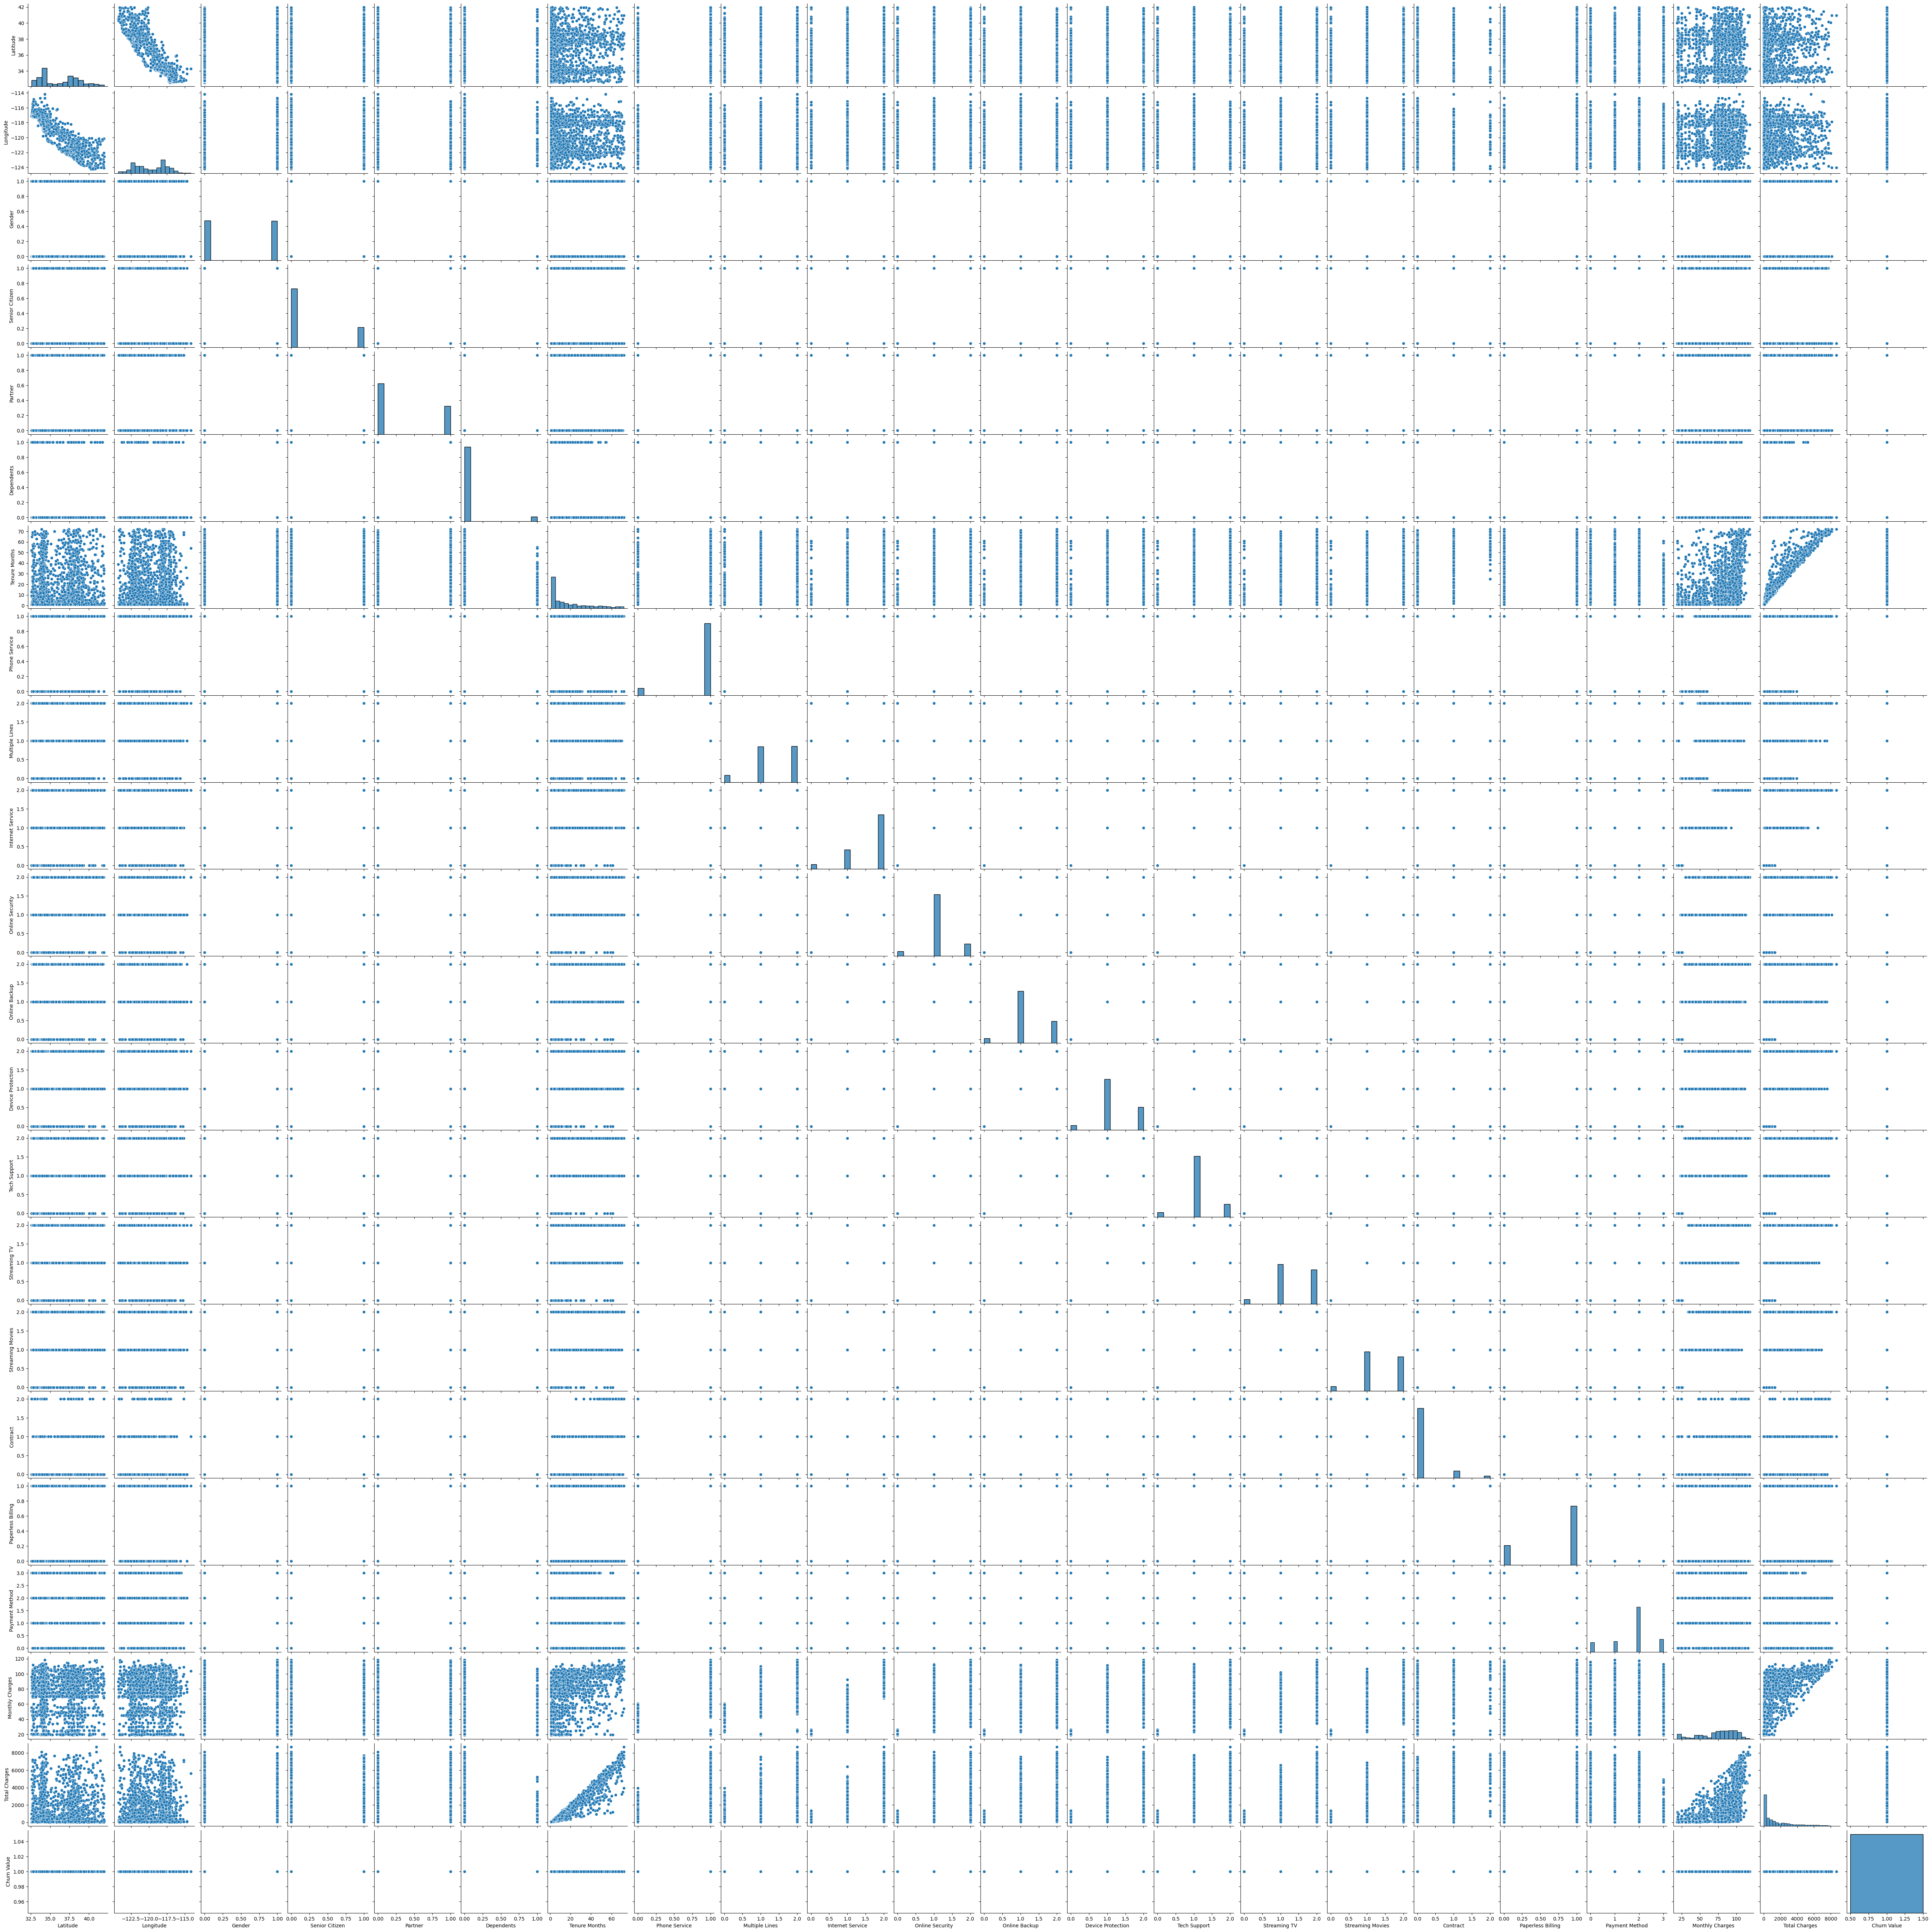

In [359]:
sns.pairplot(df_visual[df_visual['Churn Value']==1])
plt.show()

In [345]:
df['Churn Reason'].value_counts()

Churn Reason
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Long distance charges                         44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: c

In [433]:
df_fe[df_fe['Churn Value'] == 1]['Streaming_Movies_Yes'].value_counts(normalize=True)

Streaming_Movies_Yes
0    0.562333
1    0.437667
Name: proportion, dtype: float64

In [434]:
df_fe[df_fe['Churn Value'] == 0]['Streaming_Movies_Yes'].value_counts(normalize=True)

Streaming_Movies_Yes
0    0.630073
1    0.369927
Name: proportion, dtype: float64

In [440]:
def compare_churn_features(df, target='Churn Value'):
    churners = df[df[target] == 1]
    non_churners = df[df[target] == 0]
    
    feature_cols = df.columns.drop(target)
    
    rows = []

    for col in feature_cols:
        churn_mean = churners[col].mean()
        non_churn_mean = non_churners[col].mean()
        diff = non_churn_mean - churn_mean

        rows.append({
            'Feature': col,
            'Mean (Churners)': round(churn_mean, 2),
            'Mean (Non-Churners)': round(non_churn_mean, 2),
            'Difference': round(diff, 2)
        })

    result = pd.DataFrame(rows)
    result.sort_values(by='Difference', ascending=False, inplace=True)
    return result

In [441]:
compare_churn_features(df_visual)

,Feature,Mean (Churners),Mean (Non-Churners),Difference
20,Total Charges,1531.80,2549.91,1018.12
6,Tenure Months,17.98,37.57,19.59
16,Contract,0.14,0.89,0.75
5,Dependents,0.06,0.29,0.24
4,Partner,0.36,0.53,0.17
0,Latitude,36.27,36.29,0.02
2,Gender,0.50,0.51,0.01
7,Phone Service,0.91,0.90,-0.01
1,Longitude,-119.78,-119.80,-0.02
13,Tech Support,1.11,1.06,-0.04
